In [1]:
# Importa librerias
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importa el dataset
df = pd.read_csv("C:/Users/USUARIO/OneDrive/UNAD/Ing de Sistemas/3er semestre (2023-16-04)/ANÁLISIS DE DATOS/Etapa 4/Cleaned-Data.csv")
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,Other


In [3]:
# Filtrar el DataFrame para incluir solo a los pacientes con edad entre 20 y 24 años
df_filtered = df[df['Age_20-24'] == 1]

In [4]:
# Realizar la codificación one-hot para la columna 'Country'
encoder = OneHotEncoder(sparse_output=False)
encoded_countries = encoder.fit_transform(df_filtered[['Country']])

In [5]:
# Crear un DataFrame con las columnas codificadas
encoded_countries_df = pd.DataFrame(encoded_countries, columns=encoder.get_feature_names_out(['Country']))

In [6]:
# Restablecer el índice de df_filtered para evitar problemas de alineación al concatenar
df_filtered = df_filtered.reset_index(drop=True)

In [7]:
# Concatenar las características codificadas con el DataFrame original
df_encoded = pd.concat([df_filtered, encoded_countries_df], axis=1)

In [8]:
# Convierte los nombres de las columnas a minúsculas y reemplaza los espacios con guiones bajos
df_encoded.columns = [column.replace(' ', '_') for column in df_encoded.columns]

In [9]:
# Eliminar la columna original 'Country'
df_encoded = df_encoded.drop('Country', axis=1)
df_encoded

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Country_China,Country_France,Country_Germany,Country_Iran,Country_Italy,Country_Other,Country_Other-EUR,Country_Republic_of_Korean,Country_Spain,Country_UAE
0,1,1,1,1,1,0,1,1,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,1,1,1,0,1,1,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,1,1,1,0,1,1,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,1,1,1,0,1,1,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,1,1,1,0,1,1,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63355,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
63356,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
63357,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
63358,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
# Definir las características y la variable objetivo
X = df_encoded.drop('Severity_Severe', axis=1)
y = df_encoded['Severity_Severe']

In [11]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Inicializar y entrenar el modelo de árbol de decisión
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [13]:
# Realizar predicciones y evaluar el modelo
y_pred = model_dt.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9497
           1       1.00      1.00      1.00      3175

    accuracy                           1.00     12672
   macro avg       1.00      1.00      1.00     12672
weighted avg       1.00      1.00      1.00     12672

[[9497    0]
 [   0 3175]]


In [14]:
# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

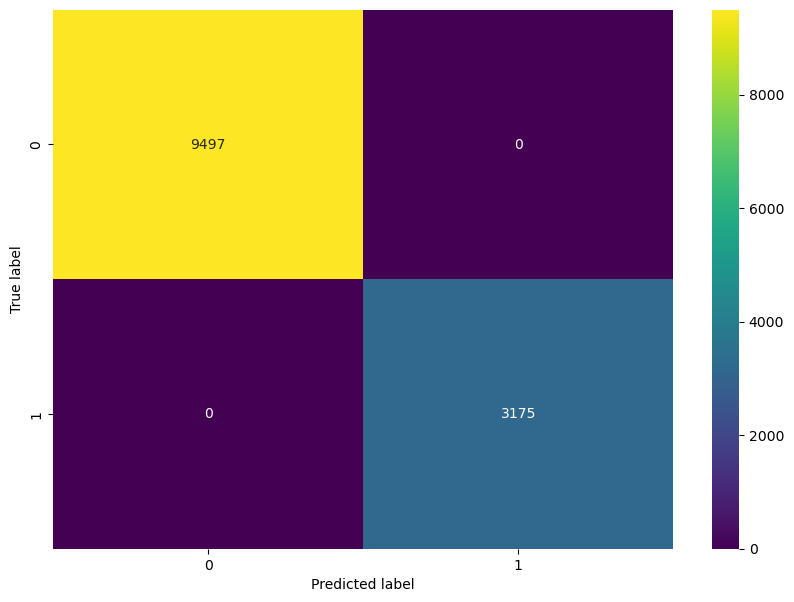

In [15]:
# Crea la figura de matplotlib
plt.figure(figsize=(10, 7))
# Crea el heatmap de Seaborn utilizando la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
# Añade los títulos y las etiquetas
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

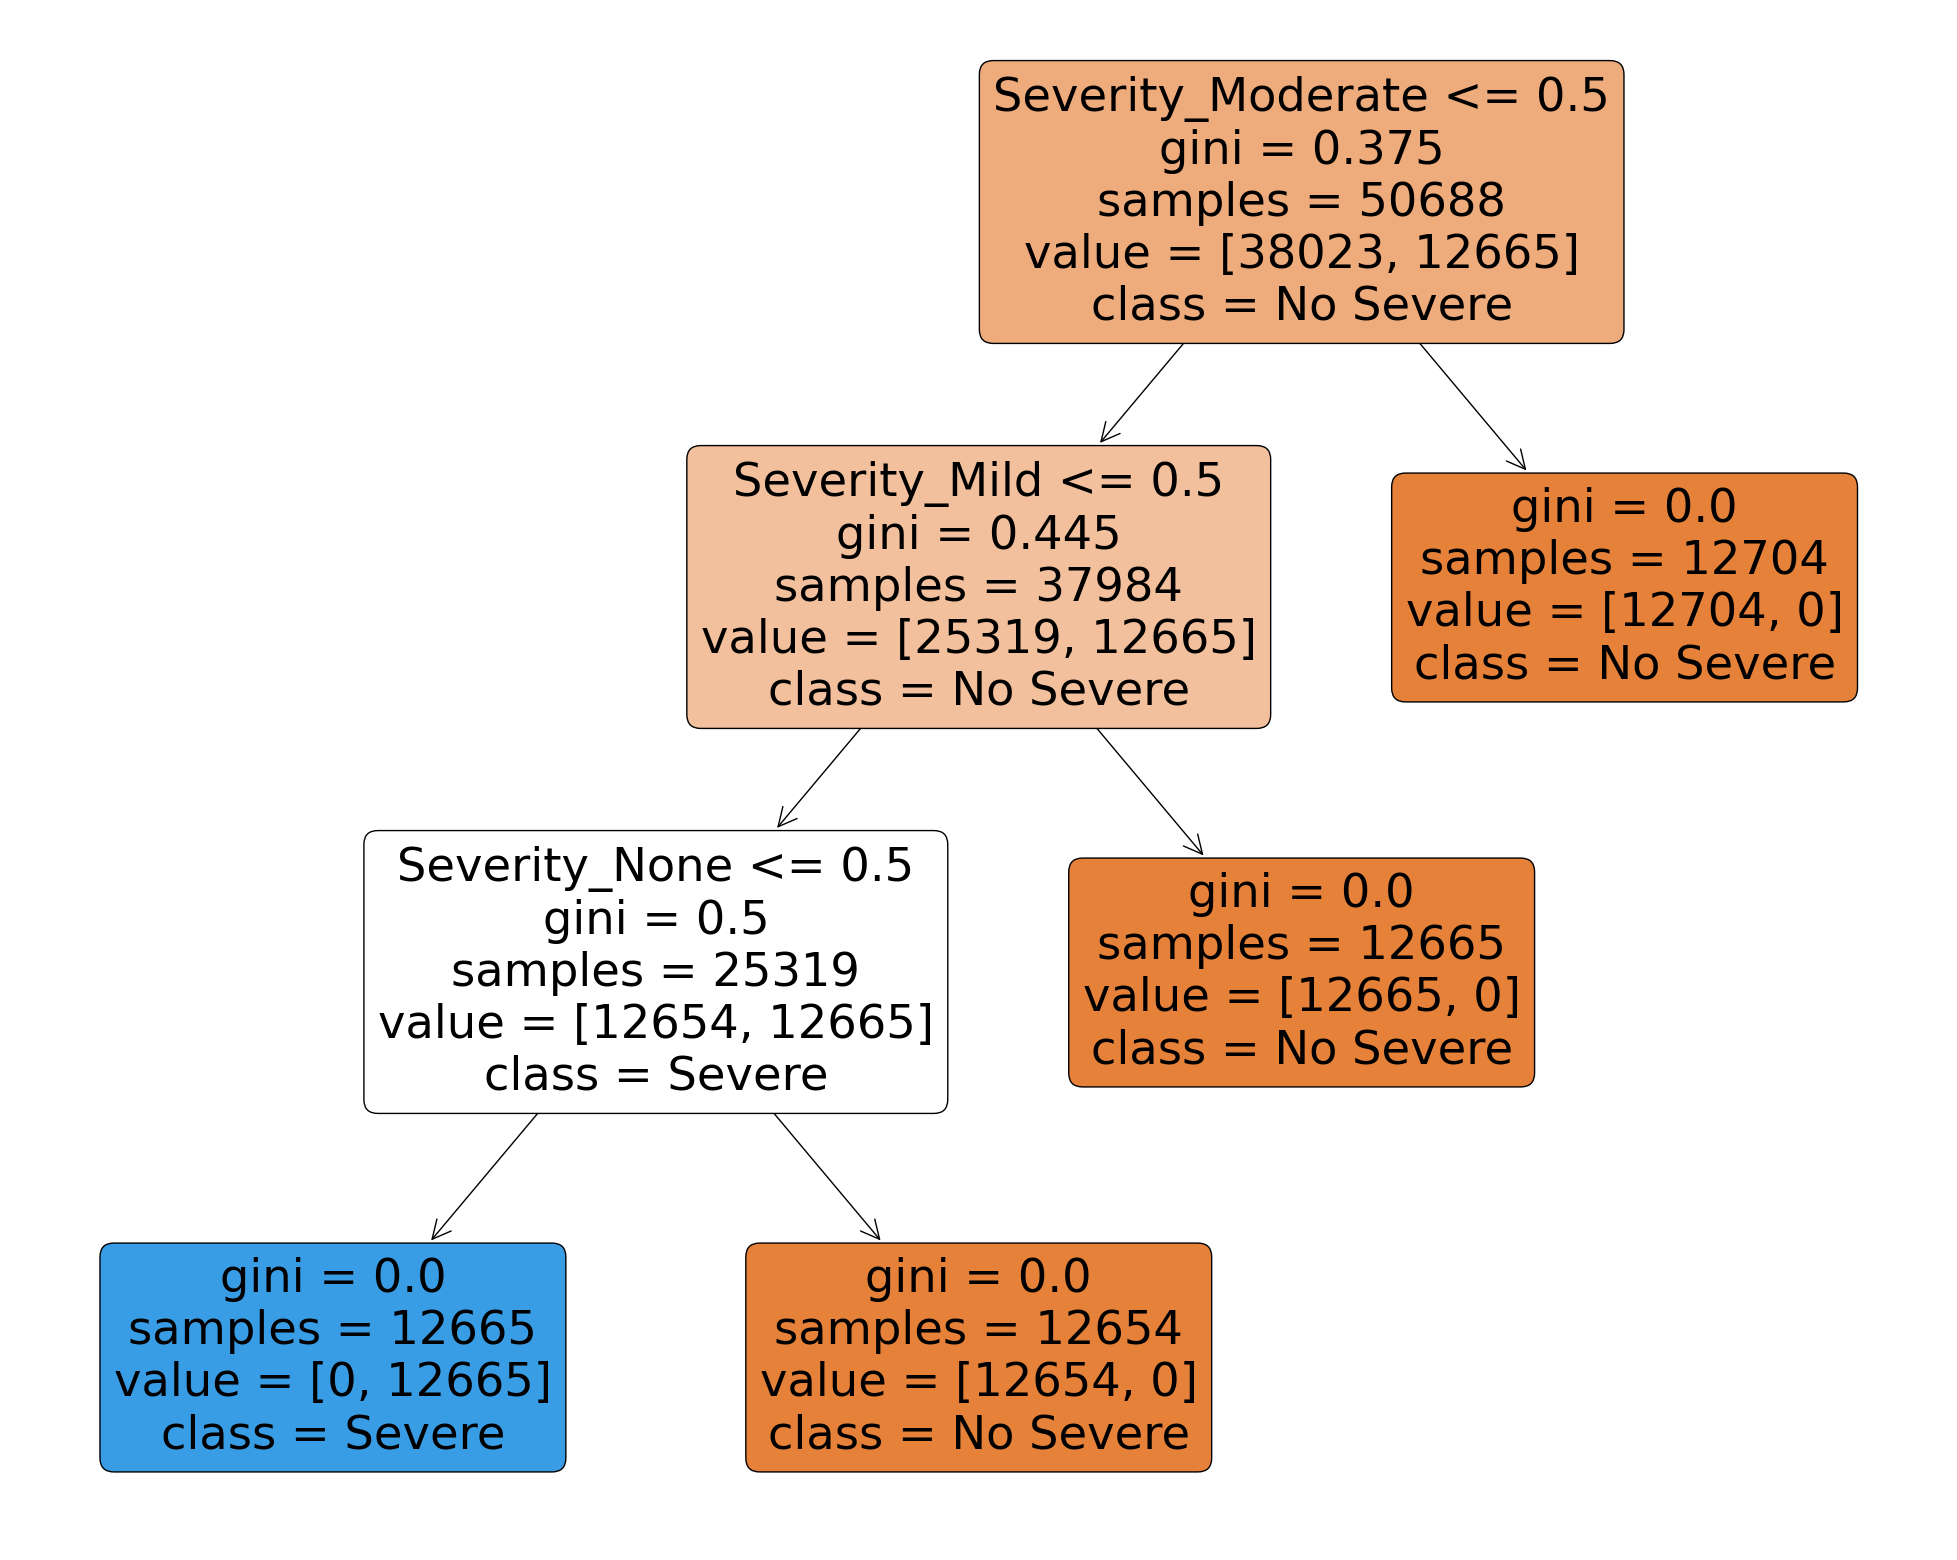

In [16]:
# Visualizar el árbol de decisión
plt.figure(figsize=(25,20))
plot_tree(model_dt, filled=True, feature_names=X.columns.tolist(), class_names=['No Severe', 'Severe'], rounded=True)
plt.savefig('tree_visualization.png')
plt.show()

In [17]:
# Obtener las importancias de las características y vincularlas con los nombres de las columnas
importances = model_dt.feature_importances_
feature_names = X_train.columns

In [18]:
# Crear un DataFrame para visualizar las importancias de las características
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

In [19]:
# Ordenar el DataFrame por importancia
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

In [20]:
# Mostrar las características más importantes
print(feature_importance_df)

                       feature  importance
21               Severity_None    0.666254
19               Severity_Mild    0.222342
20           Severity_Moderate    0.111403
26              Country_France    0.000000
22           Contact_Dont-Know    0.000000
23                  Contact_No    0.000000
24                 Contact_Yes    0.000000
25               Country_China    0.000000
0                        Fever    0.000000
18          Gender_Transgender    0.000000
28                Country_Iran    0.000000
29               Country_Italy    0.000000
30               Country_Other    0.000000
31           Country_Other-EUR    0.000000
32  Country_Republic_of_Korean    0.000000
33               Country_Spain    0.000000
27             Country_Germany    0.000000
17                 Gender_Male    0.000000
1                    Tiredness    0.000000
8                   Runny-Nose    0.000000
2                    Dry-Cough    0.000000
3      Difficulty-in-Breathing    0.000000
4          